<a href="https://colab.research.google.com/github/LudovicaCi/PodcastSentimentAnalyzer/blob/main/TrainingsetBuilding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Training Set Building



In [ ]:
import pandas as pd

reviews = pd.read_csv('/content/drive/MyDrive/DataMining/Dataset/reviews_podcast_2020.csv')

In [ ]:
print(reviews.columns)

Index(['content', 'rating'], dtype='object')


In [ ]:
df = reviews

In [ ]:
# Map ratings to classes
class_mapping = {
    5: 'positive',
    3: 'neutral',
    1: 'negative'
}

# Replace values in the 'rating' column with the corresponding classes
df['rating'] = df['rating'].replace(class_mapping)

# Display the DataFrame with ratings replaced by classes
print(df.head())

                       content    rating
0                   take me on  positive
1       show off the quads pft  positive
2            best fill in ever  positive
3          i needed this today  positive
4  i need so much more of this  positive


In [ ]:
# Create three separate DataFrames for each rating class
df_positive = df[df['rating'] == 'positive'].copy()
df_neutral = df[df['rating'] == 'neutral'].copy()
df_negative = df[df['rating'] == 'negative'].copy()

# Display the first five elements of each DataFrame
print("Positive DataFrame:")
print(df_positive.head())
print(df_positive.shape[0])

print("\nNeutral DataFrame:")
print(df_neutral.head())
print(df_neutral.shape[0])

print("\nNegative DataFrame:")
print(df_negative.head())
print(df_negative.shape[0])

Positive DataFrame:
                       content    rating
0                   take me on  positive
1       show off the quads pft  positive
2            best fill in ever  positive
3          i needed this today  positive
4  i need so much more of this  positive
978798

Neutral DataFrame:
                                               content   rating
87   i am only on episode until now i binged and lo...  neutral
117  if it wasnt for brit i would give you a star r...  neutral
132  great story telling by dr phill but the music ...  neutral
155  kara is a self centered narcissistic who think...  neutral
166  do several podcasts in a couple days to stock ...  neutral
26412

Negative DataFrame:
                                              content    rating
15  look elsewhere for thoughtful and unbiased nfl...  negative
18    without chris carter the show isnt good anymore  negative
27  ive tried a few different times but cant get p...  negative
29  hours minutes minutes of which was s

In [ ]:
# Determine the minimum number of reviews per class
min_reviews_per_class = min(len(df_positive), len(df_neutral), len(df_negative))

# Sample the same number of reviews from each DataFrame
df_balanced = pd.concat([
    df_positive.sample(min_reviews_per_class, random_state=42),
    df_neutral.sample(min_reviews_per_class, random_state=42),
    df_negative.sample(min_reviews_per_class, random_state=42)
])

# Display the balanced DataFrame
print(df_balanced.head())

                                                  content    rating
563136  the way he speaks gets me excited ive shared t...  positive
699299  i listen to a lot of political podcasts while ...  positive
688315  with my background ive always been interested ...  positive
886357  raw purposedriven and vulnerable jameelah is l...  positive
363986  ive been following jomboy since he had less th...  positive


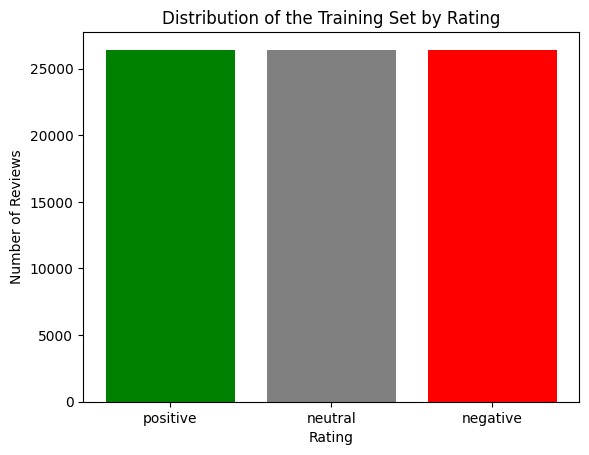

In [ ]:
import matplotlib.pyplot as plt

ratings_distribution = df_balanced['rating'].value_counts()

# Display the distribution of the training set
plt.bar(ratings_distribution.index, ratings_distribution.values, color=['green', 'gray', 'red'])
plt.title('Distribution of the Training Set by Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
# Save the balanced DataFrame to a CSV file
df_balanced.to_csv('/content/drive/MyDrive/DataMining/Dataset/trainingSet.csv', index=False)